# Alfredo Coviello
# UT AI/ML course GreatLearning
# Project Concrete Strength Prediction

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [312]:
concrete_df = pd.read_csv("concrete.csv")
concrete_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


### Exploratory data quality report reflecting the following:

1. Univariate analysis – data types and description of the independent attributes
 which should include (name, meaning, range of values observed, central values
 (mean and median), standard deviation and quartiles, analysis of the body of
 distributions / tails, missing values, outliers (10 Marks)

In [313]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [314]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [315]:
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [316]:
# No missing values

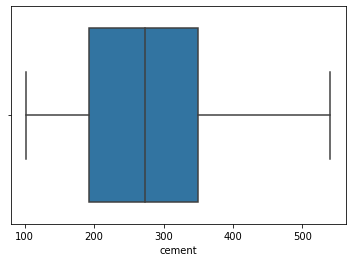

In [317]:
#plt.figure(figsize=(8,8))
sns.boxplot(concrete_df.cement, orient="h")

cement


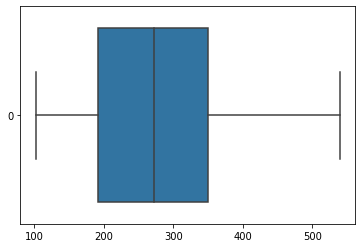

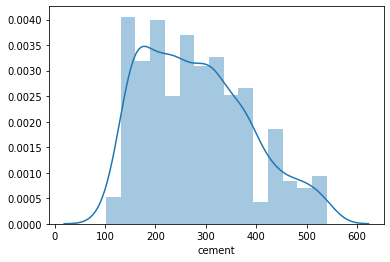

slag


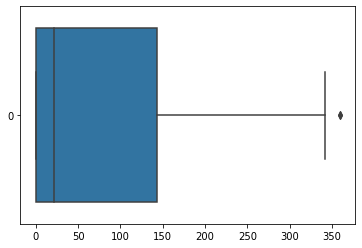

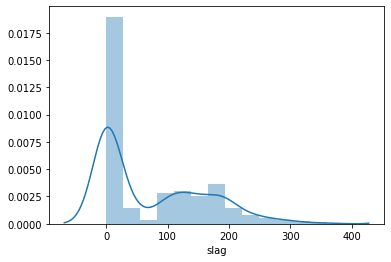

ash


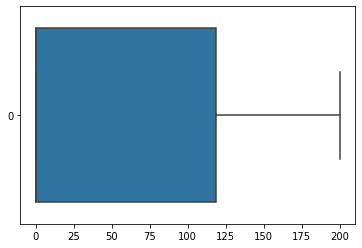

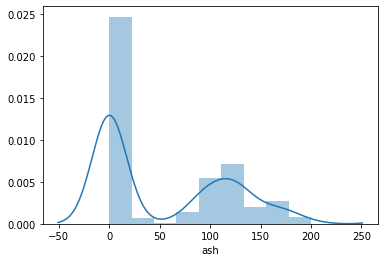

water


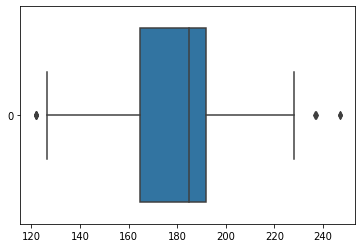

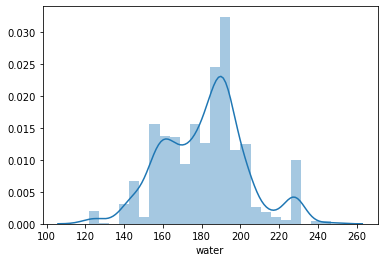

superplastic


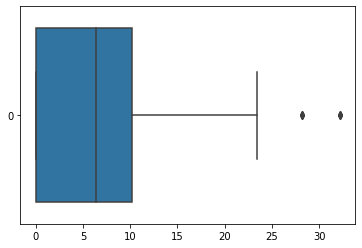

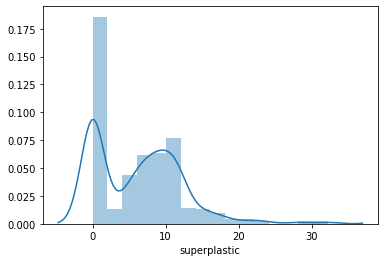

coarseagg


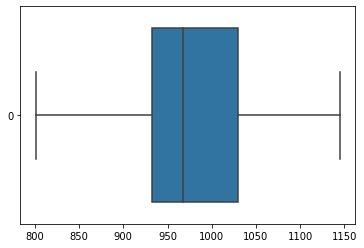

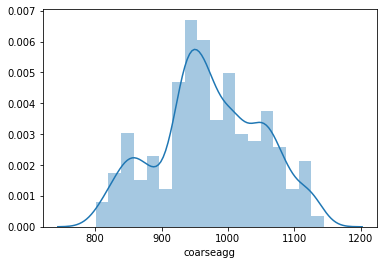

fineagg


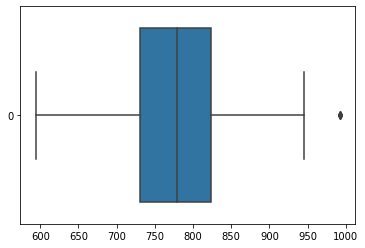

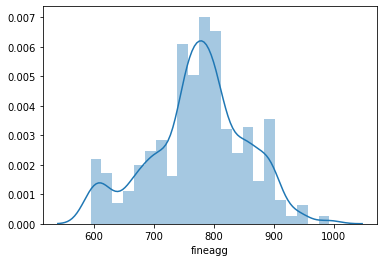

age


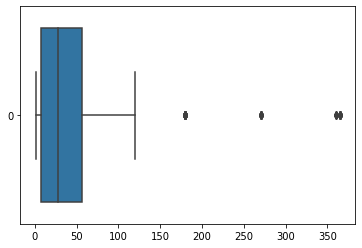

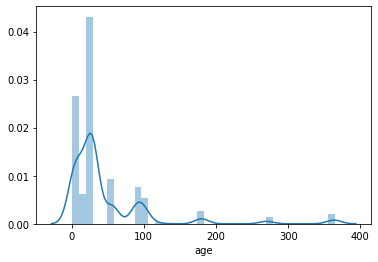

strength


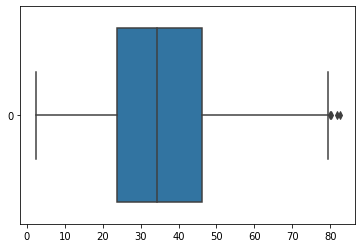

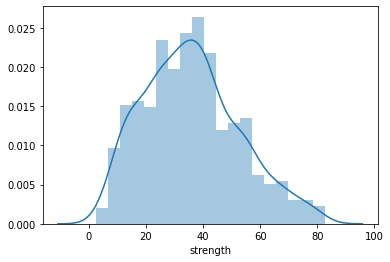

In [318]:
#plt.figure(figsize=(8,8))
cols = concrete_df.columns
for c in cols:
    print(c)
    sns.boxplot(data=concrete_df[c],  orient="h")
    plt.show()
    sns.distplot(concrete_df[c], kde=True,)
    plt.show()


In [319]:
concrete_df.slag.value_counts()

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

In [320]:
cols = concrete_df.columns
for c in cols:
    print(f"{c} *** value counts total: {len(concrete_df[c].unique())}")
    print(f"Values: {str(concrete_df[c].values)}")
    print(f"Value counts:\n{str(concrete_df[c].value_counts(normalize=True))}\n")

    

cement *** value counts total: 278
Values: [141.3 168.9 250.  ... 276.4 342.  540. ]
Value counts:
425.0    0.019417
362.6    0.019417
251.4    0.014563
446.0    0.013592
310.0    0.013592
           ...   
312.9    0.000971
261.9    0.000971
325.6    0.000971
143.8    0.000971
145.4    0.000971
Name: cement, Length: 278, dtype: float64

slag *** value counts total: 185
Values: [212.   42.2   0.  ... 116.   38.    0. ]
Value counts:
0.0      0.457282
189.0    0.029126
106.3    0.019417
24.0     0.013592
20.0     0.011650
           ...   
161.0    0.000971
160.5    0.000971
129.0    0.000971
100.6    0.000971
209.0    0.000971
Name: slag, Length: 185, dtype: float64

ash *** value counts total: 156
Values: [  0.  124.3  95.7 ...  90.3   0.    0. ]
Value counts:
0.0      0.549515
118.3    0.019417
141.0    0.015534
24.5     0.014563
79.0     0.013592
           ...   
119.0    0.000971
134.0    0.000971
95.0     0.000971
130.0    0.000971
129.7    0.000971
Name: ash, Length: 156, dtype:

## All variables are numeric (one int, rest floats), no missing values

### Comments on distributions:
###  cement: Sligthly skewed to the left, no outliers
###  slag: it seems bi-modal with a large number of 0's, 46% (>10x the next value), one of its modes.
###        Sligthly skewed to the right with few outliers to the right
###  ash: bi-modal with a large number of 0's, 55%, one of its modes, no outliers
###  water: bi or tri-modal, with some outliers to the left and right
###  superplastic: it seems bi-modal with a large number 0's, 37%, one of its modes, some outliers to the right
###  coarseagg: seems bi-modal, no outliers
###  fineagg: close to normally distributed, some outlies to the right
###  age: seems to have a few modes, a high value at 28, 41%, three groups of outliers to the right
###  strenght (dependant variable): seems normally distributed, some skewness and outliers to the right


# 2. Bi-variate analysis
## between the predictor variables and between the predictor
## variables and target column. Comment on your findings in terms of their
## relationship and degree of relation if any. Visualize the analysis using boxplots and
## pair plots, histograms or density curves. (10 marks)

In [321]:
# Correlation
cor = concrete_df.corr() 
abs(cor)>0.5

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,True,False,False,False,False,False,False,False,False
slag,False,True,False,False,False,False,False,False,False
ash,False,False,True,False,False,False,False,False,False
water,False,False,False,True,True,False,False,False,False
superplastic,False,False,False,True,True,False,False,False,False
coarseagg,False,False,False,False,False,True,False,False,False
fineagg,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,True,False
strength,False,False,False,False,False,False,False,False,True


In [322]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


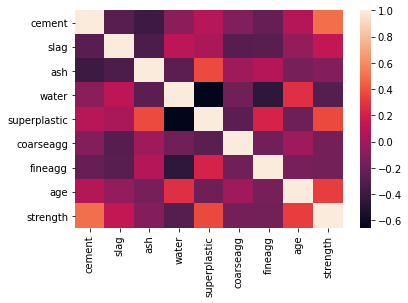

In [323]:
sns.heatmap(cor)

In [324]:
import warnings
warnings.filterwarnings("ignore")

## Correlations:
### Not a lot of strong correlations.
### Independent variables: strongest is negative between ash and superplastic
### Dependent: strongest is positive to cement, next one is positive to superplastic - both <0.5

## Won't drop any variables for now.


age
ash
cement
coarseagg
fineagg
slag
superplastic
water


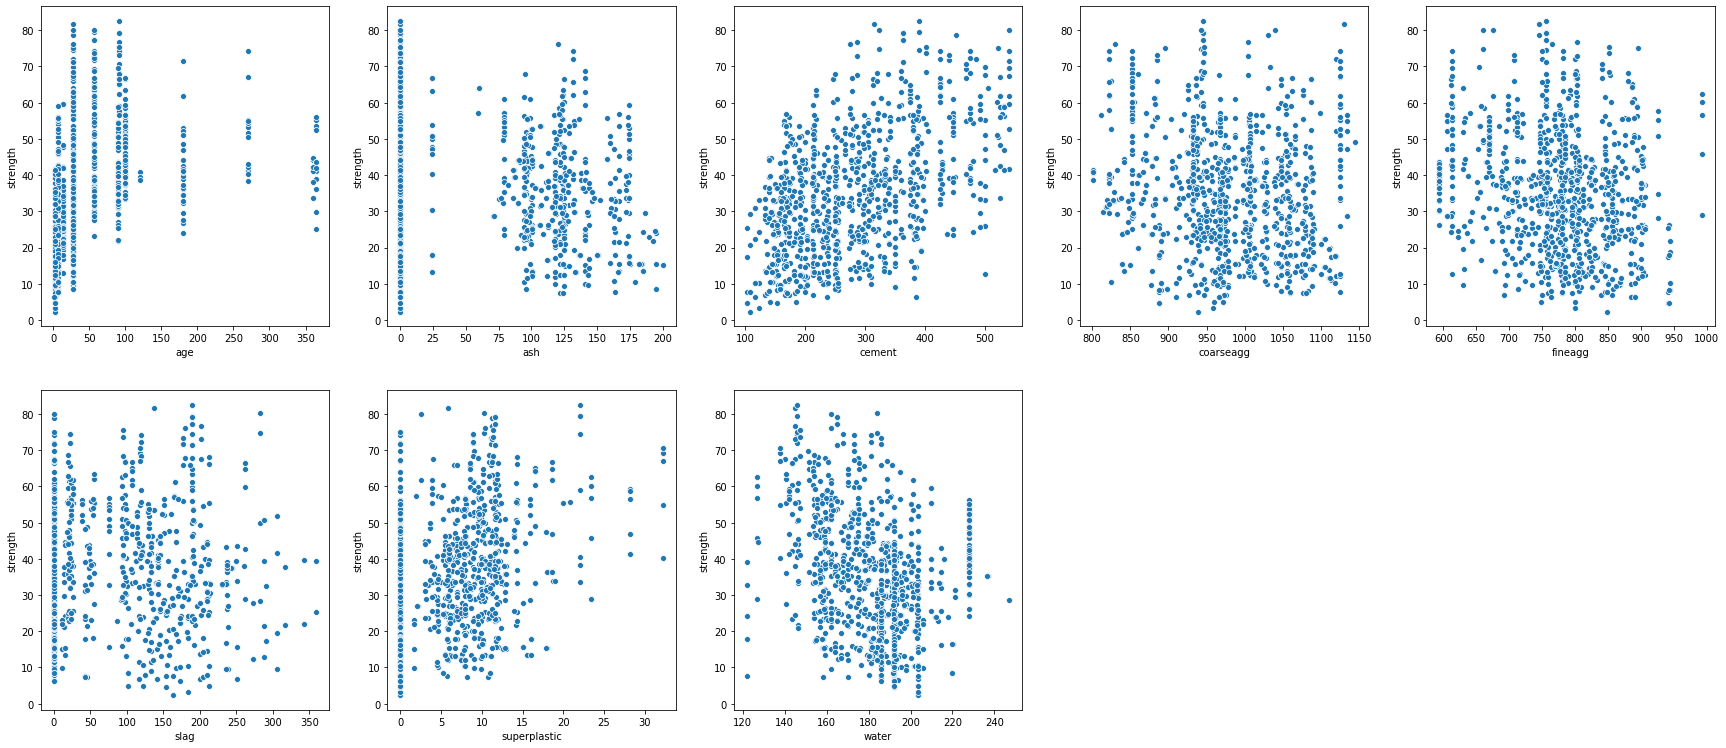

In [325]:
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
cols = concrete_df.columns.difference(('strength',))
for col in cols:
    print(col)
    plt.subplot(3, 5, pos)
    sns.scatterplot(data=concrete_df, x=col, y='strength')
    #plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   
    

### Not a lot can be said from the plots - it stands out that there are a lot of zeroes in ash, slag, superplastic and age

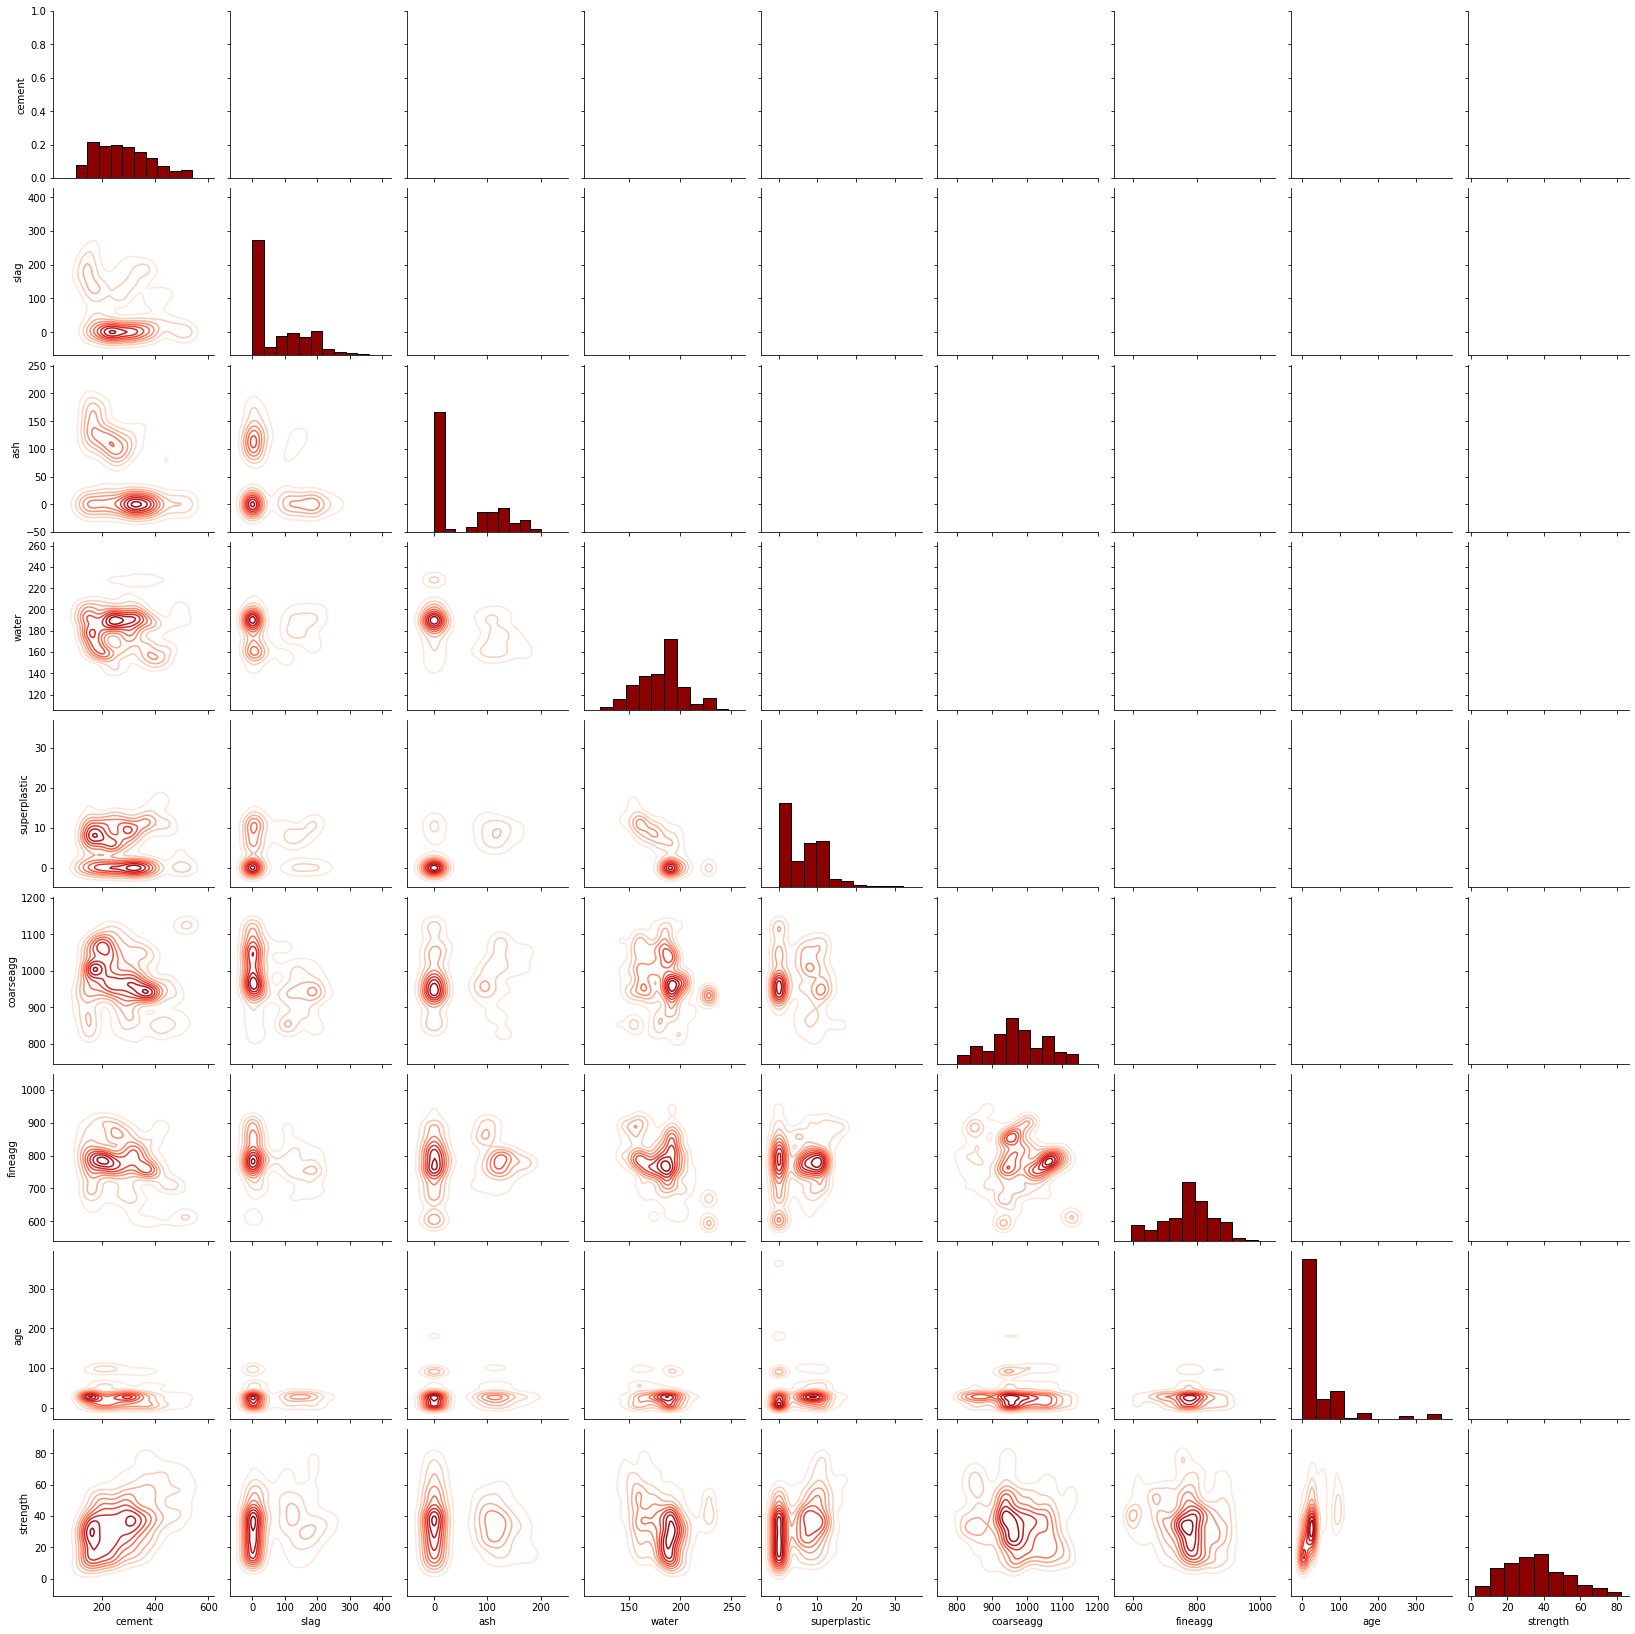

In [46]:
grid = sns.PairGrid(concrete_df)

grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')


age
ash
cement
coarseagg
fineagg
slag
superplastic
water


<Figure size 1440x720 with 0 Axes>

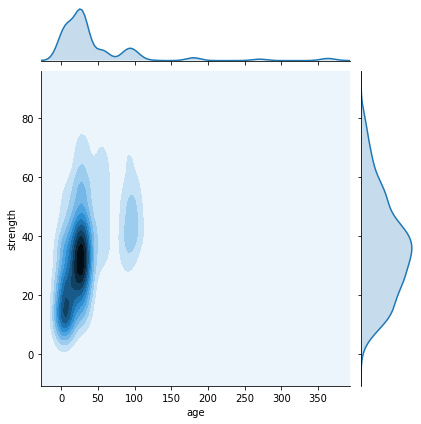

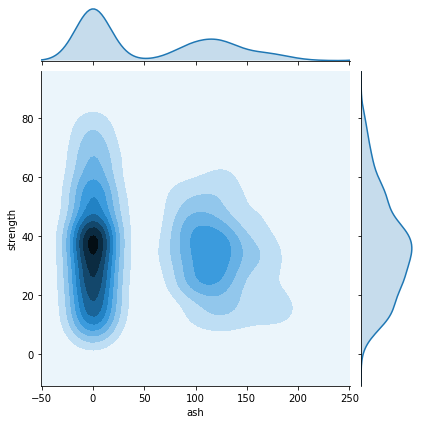

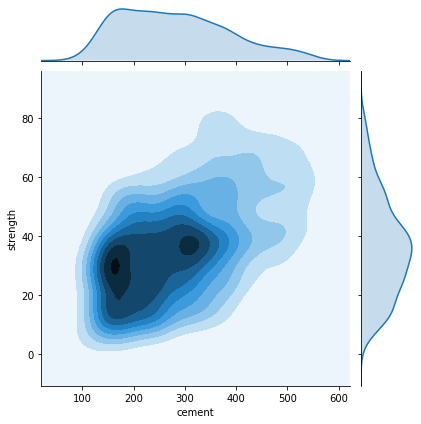

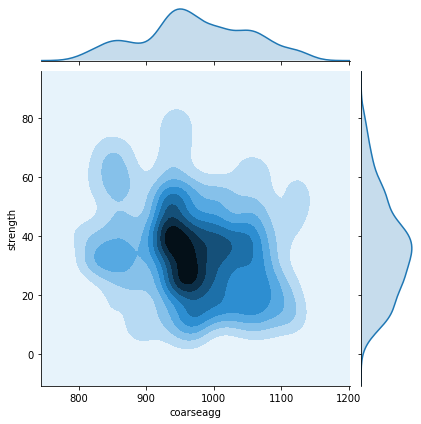

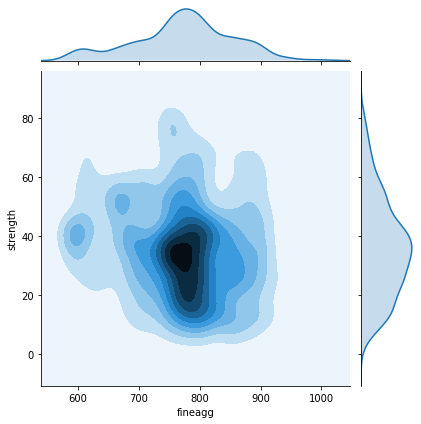

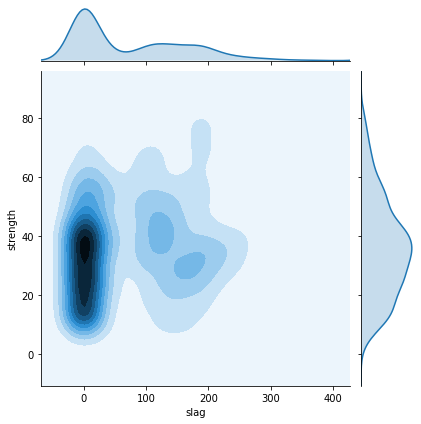

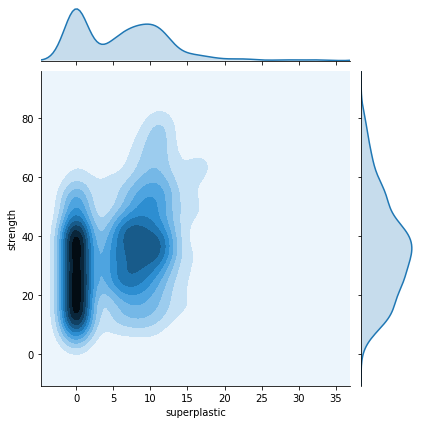

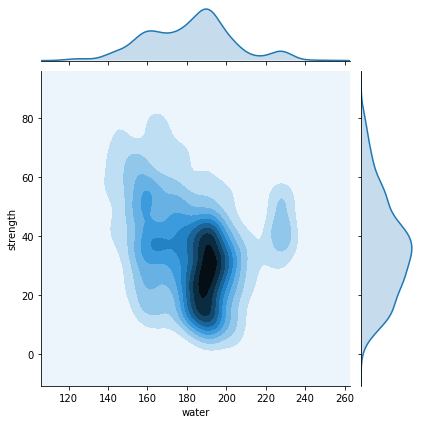

In [53]:
plt.figure(figsize= (20,10))  # setting the figure size
cols = concrete_df.columns.difference(('strength',))
for col in cols:
    print(col)
    sns.jointplot(concrete_df[col], concrete_df.strength, kind='kde')
    #sns.scatterplot(data=concrete_df, x=col, y='strength')
    #plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   




In [326]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


## 3. Feature Engineering techniques (10 marks)
### a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
### b. Get data model ready and do a train test split.
### c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

#### Coarseagg and fineagg have very similar shapes and identical corr index (-0.16). I'll combine them

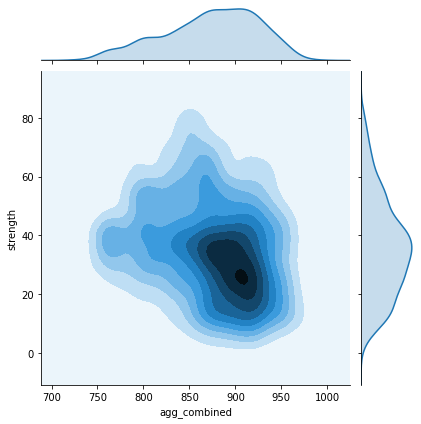

In [329]:
c_df = concrete_df.copy()
#c_df = df.loc[:, ['fineagg', 'coarseagg']]
c_df['agg_combined'] = c_df[['fineagg', 'coarseagg']].mean(axis=1)
sns.jointplot(c_df['agg_combined'], c_df.strength, kind='kde')
c_df.drop(['fineagg', 'coarseagg'], axis=1, inplace=True )

In [330]:
c_df.corr()

,cement,slag,ash,water,superplastic,age,strength,agg_combined
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,0.081946,0.497832,-0.260373
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.044246,0.134829,-0.441149
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.154371,-0.105755,0.055002
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,0.277618,-0.289633,-0.496925
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.192700,0.366079,-0.027935
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,1.000000,0.328873,-0.125940
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,0.328873,1.000000,-0.259130
agg_combined,-0.260373,-0.441149,0.055002,-0.496925,-0.027935,-0.125940,-0.259130,1.000000


### Creating the model and tuning it
1. Algorithms that you think will be suitable for this project (at least 3 algorithms).
Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)
2. Techniques employed to squeeze that extra performance out of the model
 without making it over fit. Use Grid Search or Random Search on any of the two
 models used above. Make a DataFrame to compare models after hyperparameter
 tuning and their metrics as above. (15 marks)

In [ ]:
# Datasets:
#   initial - concrete_df
#   agg variables combined
#   standard scaler
#   log scaler - will transform 0 values to very small value to be able to use it

#Algorithms:
#    Linear Regression
#    Decision Tree
#    Random Forest

In [336]:
# Scaling - do in the end to see real effect?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = c_df.columns.difference(('strength',))

c_df[cols_to_scale] = scaler.fit_transform(c_df[cols_to_scale].to_numpy())

In [337]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   age           1030 non-null   float64
 6   strength      1030 non-null   float64
 7   agg_combined  1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


In [338]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [339]:
c_df.describe()

,cement,slag,ash,water,superplastic,age,strength,agg_combined
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1030.000000,1.030000e+03
mean,-4.139084e-16,2.069542e-17,-1.379695e-17,-1.345202e-16,-1.034771e-17,5.518779e-17,35.817961,1.327094e-15
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,16.705742,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-7.073594e-01,2.330000,-2.861061e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-6.123314e-01,23.710000,-6.670823e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-2.797331e-01,34.445000,6.325559e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,1.637312e-01,46.135000,8.049587e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,5.057677e+00,82.600000,2.208808e+00


In [340]:
# Split train, test

from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X = concrete_df[concrete_df.columns.difference(('strength',))]
y = concrete_df.strength

X_scaled = c_df[c_df.columns.difference(('strength',))]
y_scaled = c_df.strength

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_scaled, random_state = 1)


scores = {}
print(X_train.info())
print(y_train.count())
print(X_test.info())
print(y_test.count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 773 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           772 non-null    int64  
 1   ash           772 non-null    float64
 2   cement        772 non-null    float64
 3   coarseagg     772 non-null    float64
 4   fineagg       772 non-null    float64
 5   slag          772 non-null    float64
 6   superplastic  772 non-null    float64
 7   water         772 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 54.3 KB
None
772
<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 339 to 107
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           258 non-null    int64  
 1   ash           258 non-null    float64
 2   cement        258 non-null    float64
 3   coarseagg     258 non-null    float64
 4   fineagg       258 non-null    float

In [341]:
X_train.describe()


,age,ash,cement,coarseagg,fineagg,slag,superplastic,water
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,46.076425,57.104275,280.735751,974.399741,770.795337,72.846632,6.286917,181.500777
std,63.309551,64.454557,105.273511,77.094929,80.449390,86.154962,5.921976,21.331397
min,1.000000,0.000000,102.000000,801.000000,594.000000,0.000000,0.000000,121.800000
25%,14.000000,0.000000,190.700000,932.000000,720.750000,0.000000,0.000000,164.900000
50%,28.000000,0.000000,275.050000,968.000000,777.800000,22.000000,6.700000,185.000000
75%,56.000000,118.300000,350.000000,1028.400000,822.000000,142.850000,10.125000,192.000000
max,365.000000,200.100000,540.000000,1134.300000,992.600000,359.400000,32.200000,247.000000


In [342]:
X_train_scaled.describe()

,age,agg_combined,ash,cement,slag,superplastic,water
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.006562,-0.012891,0.045586,-0.004137,-0.012166,0.013776,-0.003116
std,1.002697,1.001192,1.007639,1.007830,0.999043,0.991800,0.999417
min,-0.707359,-2.861061,-0.847144,-1.715253,-0.856888,-1.039143,-2.800211
25%,-0.501465,-0.667082,-0.847144,-0.866089,-0.856888,-1.039143,-0.780894
50%,-0.279733,0.063256,-0.847144,-0.058569,-0.601778,0.082958,0.160829
75%,0.163731,0.787664,1.002278,0.658961,0.799585,0.656570,0.488793
max,5.057677,1.971622,2.281084,2.477915,3.310675,4.353642,3.065647


In [360]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score = lr.score(X_test, y_test)
score

data['LinearRegression'] = score

# scaled DS
lr_scaled = LinearRegression()

lr_scaled.fit(X_train_scaled, y_train_scaled)

pred = lr_scaled.predict(X_test_scaled)  # Predictions from logistic regression
score = lr_scaled.score(X_test_scaled, y_test_scaled)
score

data['LinearRegression scaled'] = score
data

{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [355]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

pred = dt.predict(X_test)  # Predictions from logistic regression
score = dt.score(X_test, y_test)

data['DecisionTree'] = score

dt_scaled = DecisionTreeRegressor()

dt_scaled.fit(X_train_scaled, y_train_scaled)

pred = dt_scaled.predict(X_test_scaled)  # Predictions from logistic regression
score = dt_scaled.score(X_test_scaled, y_test_scaled)

data['DecisionTree scaled'] = score
data

{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9092660860005921,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8635478771489609,
 'RF X validation score': 0.9161469941574651,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9061625622505115,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [358]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred = rf.predict(X_test)
score = rf.score(X_test, y_test)

data["RandomForestRegressor"] = score

rf_scaled = RandomForestRegressor()
rf_scaled.fit(X_train_scaled, y_train_scaled)

pred = rf_scaled.predict(X_test_scaled)
score = rf_scaled.score(X_test_scaled, y_test_scaled)

data["RandomForestRegressor scaled"] = score

data

{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9161469941574651,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [350]:
# Polynomial Linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
PolynomialFeatures()
poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

print(X_test2.shape)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

print(poly_clf.score(X_test2, y_test))

score = poly_clf.score(X_test2, y_test)
data["Poly validation score"] = score

X_train2_scaled = poly.fit_transform(X_train_scaled)
X_test2_scaled = poly.fit_transform(X_test_scaled)

print(X_test2_scaled.shape)

poly_clf_scaled = linear_model.LinearRegression()

poly_clf_scaled.fit(X_train2_scaled, y_train_scaled)

y_pred_scaled = poly_clf_scaled.predict(X_test2_scaled)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf_scaled.score(X_train2_scaled, y_train_scaled))

print(poly_clf_scaled.score(X_test2_scaled, y_test_scaled))

score = poly_clf_scaled.score(X_test2_scaled, y_test_scaled)
data["Poly validation score scaled"] = score



(258, 37)
0.7544089309353125
0.7505497542093815
(258, 29)
0.7451398913210082
0.7378512780180924


In [352]:
# Lasso, Ridge

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

ridge_scaled = Ridge(alpha=.3)
ridge_scaled.fit(X_train_scaled,y_train_scaled)
print ("Ridge model scaled:", (ridge_scaled.coef_))

lasso_scaled = Lasso(alpha=0.1)
lasso_scaled.fit(X_train_scaled,y_train_scaled)
print ("Lasso model scaled:", (lasso_scaled.coef_))

print(ridge_scaled.score(X_train_scaled, y_train_scaled))
print(ridge_scaled.score(X_test_scaled, y_test_scaled))

print(lasso_scaled.score(X_train_scaled, y_train_scaled))
print(lasso_scaled.score(X_test_scaled, y_test_scaled))


Ridge model: [ 0.11188612  0.09264414  0.12740819  0.02491441  0.03692044  0.11071863
  0.36921898 -0.09843415]
Lasso model: [ 0.11183518  0.09254541  0.12727014  0.02456018  0.03665798  0.11053088
  0.36286994 -0.10003425]
0.6081240738578486
0.6271244907000315
0.608121902909985
0.6272817893864233
Ridge model scaled: [ 7.01609787  2.62940234  5.36101092 12.66318633  8.98390967  2.48991178
 -2.40949822]
Lasso model scaled: [ 6.79950105  0.53408056  3.61012993 10.70134549  6.98466016  2.28383493
 -3.80467165]
0.6065785627975393
0.6348547440641146
0.603957750495776
0.633977921633135


In [351]:
# CV for polynomial
from sklearn.model_selection import cross_val_score
print(poly_clf.score(X_test2, y_test))
#For Decision Tree dt
score = cross_val_score(poly_clf, X, y, cv = 10).mean()
print(f'Cross validation score of Polynomial regression = {score}')
data["Poly X validation score"] = score
data

poly_clf = linear_model.LinearRegression()

print(poly_clf_scaled.score(X_test2_scaled, y_test_scaled))
score = cross_val_score(poly_clf_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Polynomial regression scaled = {score}')
data["Poly X validation score scaled"] = score
data
             
               

0.7505497542093815
Cross validation score of Polynomial regression = 0.5919104690705976
0.7378512780180924
Cross validation score of Polynomial regression scaled = 0.5924460677534764


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.858085832968337,
 'RandomForestRegressor': 0.9092660860005921,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8635478771489609,
 'RF X validation score': 0.9161469941574651,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919046931162459,
 'Ridge X validation score': 0.5919104891946885,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8399690782135278,
 'RandomForestRegressor scaled': 0.9061625622505115,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764}

In [353]:
# Cross validation lasso
from sklearn.model_selection import cross_val_score
score = cross_val_score(lasso, X, y, cv = 10).mean()
print(f'Cross validation score of Lasso = {score}')
data["Lasso X validation score"] = score

score = cross_val_score(lasso_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Lasso scaled = {score}')
data["Lasso X validation score scaled"] = score



Cross validation score of Lasso = 0.5919027244018678
Cross validation score of Lasso scaled = 0.5911939768429446


In [354]:
# Cross validation ridge
from sklearn.model_selection import cross_val_score
score = cross_val_score(ridge, X, y, cv = 10).mean()
print(f'Cross validation score of Ridge = {score}')
data["Ridge X validation score"] = score
data

score = cross_val_score(ridge_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Ridge scaled = {score}')
data["Ridge X validation score scaled"] = score
data


Cross validation score of Ridge = 0.5919104892797081
Cross validation score of Ridge scaled = 0.5924563277716538


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.858085832968337,
 'RandomForestRegressor': 0.9092660860005921,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8635478771489609,
 'RF X validation score': 0.9161469941574651,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8399690782135278,
 'RandomForestRegressor scaled': 0.9061625622505115,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled': 

In [356]:
# Cross validation dt
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score}')
data["DT X validation score"] = score
data

score = cross_val_score(dt_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Decision tree scaled = {score}')
data["DT X validation score scaled"] = score
data



Cross validation score of Decision tree = 0.8674169849816623
Cross validation score of Decision tree scaled = 0.8616191705518237


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9092660860005921,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9161469941574651,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9061625622505115,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [260]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [359]:
#For Random Forests RF
score = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random Forest = {score}')
data["RF X validation score"] = score
data

score = cross_val_score(rf_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Random Forest = {score}')
data["RF X validation score scaled"] = score
data


Cross validation score of Random Forest = 0.9180216731595483
Cross validation score of Random Forest = 0.9194550895479516


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5931787483899662,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [361]:
#For Linear Regression lr
score = cross_val_score(lr, X, y, cv = 10).mean()
print(f'Cross validation score of Linear Regression = {score}')
data["LR X validation score"] = score
data

score = cross_val_score(lr_scaled, X_scaled, y_scaled, cv = 10).mean()
print(f'Cross validation score of Linear Regression scaled = {score}')
data["LR X validation score scaled"] = score
data



Cross validation score of Linear Regression = 0.5919104690705976
Cross validation score of Linear Regression scaled = 0.5924460677534764


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6025767300085325,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [117]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [227]:
params_dist_lr = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'n_jobs': [1, 5, 10]
}

In [362]:
# Random CV LR
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(lr, param_distributions=params_dist_lr, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["LR RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(lr_scaled, param_distributions=params_dist_lr, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["LR RandomCV score scaled"] = randomCV.best_score_
data

data

{'normalize': False, 'n_jobs': 10, 'fit_intercept': False, 'copy_X': True}
{'normalize': True, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': False}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.601296715529575,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled':

In [272]:
lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [277]:
params_dist_lasso = {
    'alpha': np.arange(0.1, 0.8),
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [10, 100, 500, 1000, 5000],
    'normalize': [True, False],
    'positive': [True, False],
    'precompute': [True, False],
    'selection': ['cyclic', 'random']
}

In [363]:
# Random CV Lasso
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(lasso, param_distributions=params_dist_lasso, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["Lasso RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(lasso_scaled, param_distributions=params_dist_lasso, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["Lasso RandomCV score scaled"] = randomCV.best_score_


data

{'selection': 'random', 'precompute': True, 'positive': False, 'normalize': True, 'max_iter': 500, 'fit_intercept': False, 'copy_X': True, 'alpha': 0.1}
{'selection': 'cyclic', 'precompute': True, 'positive': False, 'normalize': True, 'max_iter': 500, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.1}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013042594902377,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

In [279]:
ridge.get_params()

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [286]:
param_dist_ridge = {
    'alpha': np.arange(0.1, 0.8),
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [10, 100, 500, 1000, 5000],
    'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'] 
}

In [364]:
# Random Search CV Ridge
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(ridge, param_distributions=param_dist_ridge, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["Ridge RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(ridge_scaled, param_distributions=param_dist_ridge, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["Ridge RandomCV score scaled"] = randomCV.best_score_

data

{'solver': 'saga', 'normalize': False, 'max_iter': 5000, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.1}
{'solver': 'lsqr', 'normalize': True, 'max_iter': 5000, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.1}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013171275785698,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

In [365]:
# Random Search CV LR 
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(lr, param_distributions=params_dist_lr, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["LR RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(lr_scaled, param_distributions=params_dist_lr, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["LR RandomCV score scaled"] = randomCV.best_score_
data

{'normalize': True, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
{'normalize': False, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': False}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8978189530612349,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013171275785698,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

In [116]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [189]:
# Use of RandomSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
param_dist_rf = {"n_estimators": np.arange(5, 20),
                "bootstrap": [False, True],
                "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
               "criterion": ["mse", "friedman_mse", "mae"]}

In [366]:
# Random Search CV RF
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["RF RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(rf_scaled, param_distributions=param_dist_rf, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["RF RandomCV score"] = randomCV.best_score_

data


{'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 15}
{'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 7}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8918395608958474,
 'DT RandomCV score': 0.3694780335556841,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013171275785698,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

In [370]:
param_dist_rf_grid = {"n_estimators": [90, 100, 110],
                "bootstrap": [False, True],
                "max_depth": [3, 7, 11],
              "max_features": [3, 7, 9],
                "max_leaf_nodes": [3, 5, 7],
              "min_samples_split": [2, 5, 11],
              "min_samples_leaf": [1, 5, 11],
              "bootstrap": [True, False],
               "criterion": ["mse", "friedman_mse", "mae"]}
'''
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
'''

"\n{'bootstrap': True,\n 'ccp_alpha': 0.0,\n 'criterion': 'mse',\n 'max_depth': None,\n 'max_features': 'auto',\n 'max_leaf_nodes': None,\n 'max_samples': None,\n 'min_impurity_decrease': 0.0,\n 'min_impurity_split': None,\n 'min_samples_leaf': 1,\n 'min_samples_split': 2,\n 'min_weight_fraction_leaf': 0.0,\n 'n_estimators': 100,\n 'n_jobs': None,\n 'oob_score': False,\n 'random_state': None,\n 'verbose': 0,\n 'warm_start': False}\n"

In [371]:
# Grid Search RF
samples = 10  # number of random samples 
randomCV = GridSearchCV(rf, param_grid=param_dist_rf_grid) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["RF GridCV score"] = randomCV.best_score_

# This is never ending.

KeyboardInterrupt: 

In [146]:
dt.fit() .get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [225]:
dt_params = {
    'max_depth': [3, 10],
    'max_features': [1, 10],
    'max_leaf_nodes': [1, 10],
    'min_samples_leaf': [2, 10],
    'min_samples_split': [2, 10],
    'criterion': ["mse", "friedman_mse", "mae"],
    'splitter': ["best", "random"]
}

In [368]:
# Random Seach CV DT
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(dt, param_distributions=dt_params, n_iter=samples) #default cv = 3
randomCV.fit(X, y)

print(randomCV.best_params_)
randomCV.best_score_
data["DT RandomCV score"] = randomCV.best_score_

randomCV = RandomizedSearchCV(dt_scaled, param_distributions=dt_params, n_iter=samples) #default cv = 3
randomCV.fit(X_scaled, y_scaled)

print(randomCV.best_params_)
randomCV.best_score_
data["DT RandomCV score scaled"] = randomCV.best_score_

data

{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 1, 'max_depth': 10, 'criterion': 'mse'}
{'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 1, 'max_depth': 3, 'criterion': 'mae'}


{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8918395608958474,
 'DT RandomCV score': 0.2754560946282023,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013171275785698,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

In [369]:
data

{'LinearRegression': 0.6271242456735366,
 'DecisionTree': 0.8657176860620326,
 'RandomForestRegressor': 0.9056601072721499,
 'X validation score': 0.8657426871936584,
 'DT X validation score': 0.8674169849816623,
 'RF X validation score': 0.9180216731595483,
 'LR X validation score': 0.5919104690705976,
 'RF RandomCV score': 0.8918395608958474,
 'DT RandomCV score': 0.2754560946282023,
 'LR RandomCV score': 0.6012986397770762,
 'Poly validation score': 0.7505497542093815,
 'Poly X validation score': 0.5919104690705976,
 'Lasso X validation score': 0.5919027244018678,
 'Ridge X validation score': 0.5919104892797081,
 'Lasso RandomCV score': 0.6013300833806793,
 'Ridge RandomCV score': 0.6013171275785698,
 'LinearRegression scaled': 0.6348223792353012,
 'DecisionTree scaled': 0.8219994221040576,
 'RandomForestRegressor scaled': 0.9079174691695764,
 'Poly validation score scaled': 0.7378512780180924,
 'Poly X validation score scaled': 0.5924460677534764,
 'Lasso X validation score scaled'

# Conclusions
### Best performance was achieved by RandomForests, with a cross validation score of 0.92 on the scaled dataset
### Random Search CV did not improve that score - maybe need to choose better options for search.
### Grid Search CV RF did not finish - couldn't get to a point where it wold 
